In [1]:
import math
import numpy as np
from ROOT import gROOT, gDirectory, gPad, gSystem, gStyle
from ROOT import TCanvas, TFile, TProfile, TNtuple, TF1, TH1F, TH2F, THStack, TLegend, TGraphErrors, TMultiGraph, TText, TLatex
from ROOT import TGaxis, TCut
from ROOT import kWhite, kBlack, kGray, kRed, kGreen, kBlue, kYellow, kMagenta, kCyan, kOrange, kSpring, kTeal, kAzure, kViolet, kPink
# %jsroot on

Welcome to JupyROOT 6.18/00


In [2]:
gStyle.SetOptFit(0)
gStyle.SetOptStat(0)  
gStyle.SetOptTitle(1)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleStyle(0)
gStyle.SetMarkerSize(1)
gStyle.SetTitleX(0.2) 
gStyle.SetTitleY(0.9)
gStyle.SetPadLeftMargin(0.2)

In [3]:
file0 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_uu.root")
file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_dd.root")
file2 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_ss.root")

# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/LeadK/rootfiles/DQ_250GeV_OppChg.root")

In [4]:
def makePretty(p, color):
    p.SetStats(0)
    p.SetMarkerColor(color)
    p.SetLineColor(color)
    p.SetFillColor(color)
    p.SetFillStyle(3003)
    p.SetMarkerStyle(1)
    p.SetMarkerSize(0.2)
    p.SetTitle("")

def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in gDirectory.GetListOfKeys()]

In [5]:
TFile.GetKeyNames = GetKeyNames
keyList = file0.GetKeyNames()
print(keyList)

['h_mc_stable_nKaons_evt', 'h_mc_stable_Kaon_cos', 'h_mc_quark_cos', 'h_mc_quark_sep', 'h_mc_quark_m', 'h_mc_quark_pp', 'h_mc_quark_pz', 'h_mc_quark_E', 'h_mc_quark_p', 'h_mc_stable_isr_p', 'h_pfo_Kaon_cos', 'h_pfo_LeadKaons_abscos', 'h_pfo_LeadKaons_cos', 'h_pfo_jet_angdiff', 'h_pfo_jet_mult', 'h_pfo_jet_mult_uu', 'h_pfo_jet_mult_dd', 'h_pfo_jet_mult_ss', 'h_pfo_jet_charge', 'h_pfo_jet_charge_u', 'h_pfo_jet_charge_ubar', 'h_pfo_jet_charge_d', 'h_pfo_jet_charge_dbar', 'h_pfo_jet_charge_s', 'h_pfo_jet_charge_sbar', 'h_pfo_q_match_charge', 'h_pfo_qbar_match_charge', 'h_pfo_q_match_count', 'h_pfo_q_match_count0', 'h_pfo_LeadK_p', 'h_pfo_LeadK_p_10']


In [6]:
h_pfo_LeadK_p_uu = file0.Get("h_pfo_LeadK_p")
h_pfo_LeadK_p_dd = file1.Get("h_pfo_LeadK_p")
h_pfo_LeadK_p_ss = file2.Get("h_pfo_LeadK_p")

h_pfo_LeadK_p_10_uu = file0.Get("h_pfo_LeadK_p_10")
h_pfo_LeadK_p_10_dd = file1.Get("h_pfo_LeadK_p_10")
h_pfo_LeadK_p_10_ss = file2.Get("h_pfo_LeadK_p_10")

makePretty(h_pfo_LeadK_p_uu,kBlue+1)
makePretty(h_pfo_LeadK_p_dd,kGreen+1)
makePretty(h_pfo_LeadK_p_ss,kRed+1)

makePretty(h_pfo_LeadK_p_10_uu,kBlue+1)
makePretty(h_pfo_LeadK_p_10_dd,kGreen+1)
makePretty(h_pfo_LeadK_p_10_ss,kRed+1)

### Leading K momentum (not normalized)

In [7]:
c1 = TCanvas("c1","c1",500,500)

In [8]:
h_pfo_LeadK_p_ss.Draw("h")
h_pfo_LeadK_p_uu.Draw("hsame")
h_pfo_LeadK_p_dd.Draw("hsame")

In [9]:
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_LeadK_p_uu,"u#bar{u}","fp")
leg.AddEntry(h_pfo_LeadK_p_dd,"d#bar{d}","fp")
leg.AddEntry(h_pfo_LeadK_p_ss,"s#bar{s}","fp")
leg.Draw()

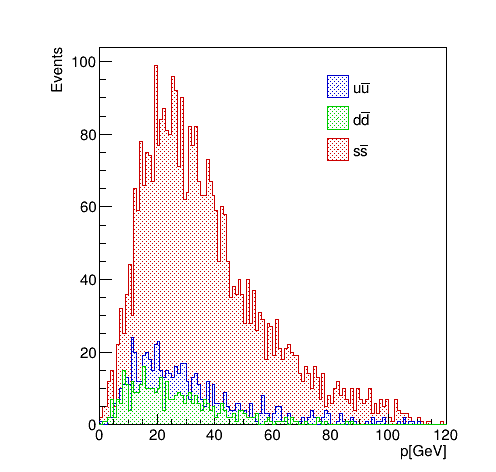

In [10]:
c1.Draw()

### Leading K momentum (normalized)

In [11]:
h_pfo_LeadK_p_ss.Sumw2()
h_pfo_LeadK_p_dd.Sumw2()
h_pfo_LeadK_p_uu.Sumw2()

In [12]:
h_pfo_LeadK_p_ss.Scale(1.0/h_pfo_LeadK_p_ss.GetEntries())
h_pfo_LeadK_p_uu.Scale(1.0/h_pfo_LeadK_p_uu.GetEntries())
h_pfo_LeadK_p_dd.Scale(1.0/h_pfo_LeadK_p_dd.GetEntries())

In [13]:
c2 = TCanvas("c2","c2",500,500)

In [14]:
# h_pfo_LeadK_p_dd.GetYaxis().SetRangeUser(0,0.04)

h_pfo_LeadK_p_dd.Rebin(3)
h_pfo_LeadK_p_uu.Rebin(3)
h_pfo_LeadK_p_ss.Rebin(3)

h_pfo_LeadK_p_dd.Draw("h")
h_pfo_LeadK_p_uu.Draw("hsame")
h_pfo_LeadK_p_ss.Draw("hsame")

In [15]:
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_LeadK_p_uu,"u#bar{u}","fp")
leg.AddEntry(h_pfo_LeadK_p_dd,"d#bar{d}","fp")
leg.AddEntry(h_pfo_LeadK_p_ss,"s#bar{s}","fp")
leg.Draw()

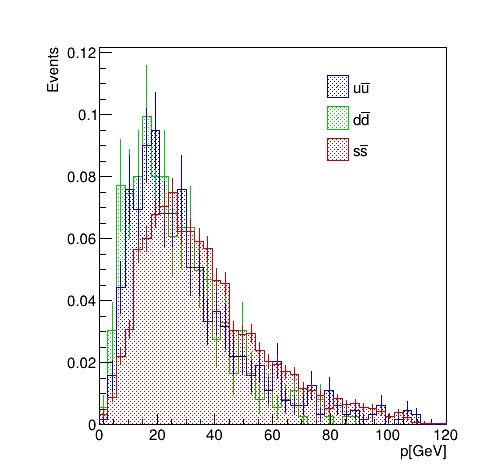

In [16]:
c2.Draw()

### Leading Kaon momentum after 10GeV cut

In [17]:
c3 = TCanvas("c3","c3",500,500)

In [18]:
h_pfo_LeadK_p_10_ss.Draw("h")
h_pfo_LeadK_p_10_uu.Draw("hsame")
h_pfo_LeadK_p_10_dd.Draw("hsame")

In [19]:
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_LeadK_p_10_uu,"u#bar{u}","fp")
leg.AddEntry(h_pfo_LeadK_p_10_dd,"d#bar{d}","fp")
leg.AddEntry(h_pfo_LeadK_p_10_ss,"s#bar{s}","fp")
leg.Draw()

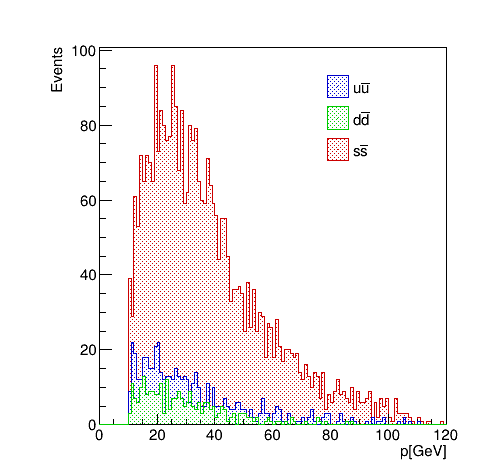

In [20]:
c3.Draw()